In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageFont, ImageDraw
import cv2
import os, os.path
from skimage import color, viewer, exposure, img_as_float #, data
from skimage.io import imread, imsave, imshow, show, imread_collection, imshow_collection
from wordcloud import WordCloud

import warnings
warnings.filterwarnings('ignore')

#### 1a. Using python to load the image on a variable, hlack_img

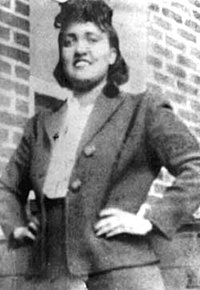

In [3]:
hlack_img = Image.open('Henrietta_Lacks.jpg')
hlack_img

#### 1b. Transforming the image into a numpy array

In [4]:
hlack_arr = np.array(hlack_img)
hlack_arr

array([[187, 186, 186, ..., 224, 245, 255],
       [181, 170, 169, ..., 198, 210, 233],
       [172, 165, 175, ..., 214, 206, 227],
       ...,
       [105, 110, 117, ..., 131, 138, 145],
       [119, 126, 127, ..., 158, 157, 157],
       [126, 131, 130, ..., 178, 172, 171]], dtype=uint8)

#### 1c. Determining the width and height of the image in pixels

In [5]:
# get width and height
width,height = hlack_img.size
  
# display width and height
print("The height of the image is: ", height, 'pixels')
print("The width of the image is: ", width, 'pixels')

The height of the image is:  290 pixels
The width of the image is:  200 pixels


#### 1d. Getting the number of pixels forming the image

In [6]:
# the number of pixels can be gotten by multiplying the height by width
pixel = width * height
print("The pixel of the image is: ", pixel, 'pixels')

The pixel of the image is:  58000 pixels


#### 1e. What characterizes the gray-scale image from a colored image

###### A gray scale only has one single colour channel while a colored image has 3 color channel, RGB, namely, Red Channel, Green Channel and Blue Channel

#### 1f. Using python to display the image from the numpy array "hlack_arr"

In [7]:
#first of all, displaying the array
hlack_arr

array([[187, 186, 186, ..., 224, 245, 255],
       [181, 170, 169, ..., 198, 210, 233],
       [172, 165, 175, ..., 214, 206, 227],
       ...,
       [105, 110, 117, ..., 131, 138, 145],
       [119, 126, 127, ..., 158, 157, 157],
       [126, 131, 130, ..., 178, 172, 171]], dtype=uint8)

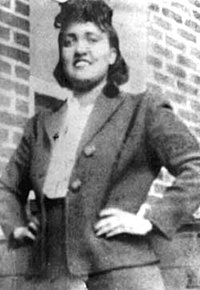

In [8]:
#displaying image from array
new_hlack_img = Image.fromarray(hlack_arr)
new_hlack_img

#### 1g. How an image is converted into a numeric array and how the array can be displayed as an image

###### An image can be converted into a numeric array by using the numpy array libray, we use the function, np.array(image), now the array can be displayed as an image by using the imshow function from the skimage.io library,we run the function imshow(img_arr) on the array to display the image from the array

#### 1h. Creating a row of features(for machine learning) from the image and also converting into a single row in pandas dataframe

(-0.5, 3.5, 4.5, -0.5)

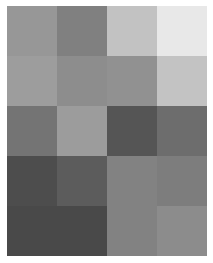

In [9]:
h2 = hlack_img.resize((hlack_img.width//50, hlack_img.height//50))
h2 = np.array(h2)
h2 = color.rgb2gray(h2)
h2.shape
imshow(h2)
plt.axis('off')

In [10]:
hlack_img.width

200

In [11]:
h2.shape

(5, 4)

In [12]:
h2.round(2)

array([[151, 128, 194, 232],
       [157, 141, 145, 196],
       [116, 156,  85, 109],
       [ 77,  92, 130, 125],
       [ 73,  74, 130, 140]], dtype=uint8)

In [13]:
h_nFeatures = (h2.shape[0]*h2.shape[1])
h_features = np.reshape(h2, h_nFeatures)
h_features

array([151, 128, 194, 232, 157, 141, 145, 196, 116, 156,  85, 109,  77,
        92, 130, 125,  73,  74, 130, 140], dtype=uint8)

In [14]:
hlack_df = pd.DataFrame(np.array([h_features]), index=['hlack'])
hlack_df

0    1    2    3    4    5    6    7    8    9   10   11  12  13   14  \
hlack  151  128  194  232  157  141  145  196  116  156  85  109  77  92  130   

        15  16  17   18   19  
hlack  125  73  74  130  140

#### 1i. Plotting an histogram for the feature to show distribution of pixels

(array([4., 1., 2., 4., 4., 2., 0., 2., 0., 1.]),
 array([ 73. ,  88.9, 104.8, 120.7, 136.6, 152.5, 168.4, 184.3, 200.2,
        216.1, 232. ]),
 <BarContainer object of 10 artists>)

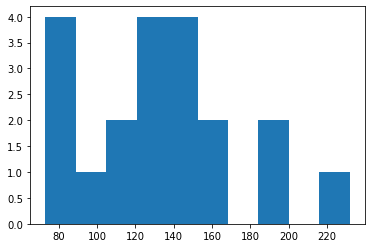

In [15]:
plt.hist(h_features)

#### 1j. Plotting a boxplot to show the distribution of pixels

{'whiskers': [<matplotlib.lines.Line2D at 0x18cd443dd30>,
 'caps': [<matplotlib.lines.Line2D at 0x18cd444f3d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x18cd443d8e0>],
 'medians': [<matplotlib.lines.Line2D at 0x18cd444faf0>],
 'fliers': [<matplotlib.lines.Line2D at 0x18cd444fe80>],
 'means': []}

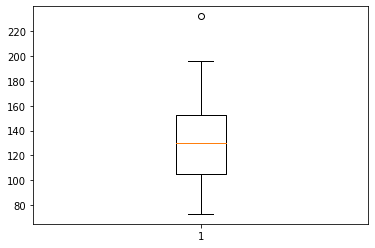

In [16]:
plt.boxplot(h_features)

###### The boxplot gives us the distribution of the numerical data
###### From the boxplot, we can infer that the red line at the middle gives us a value for the median 
###### We can also see the minimum score, excluding outliers(this is shown at the bottom end of the whisker)

#### Number 2

### Processing Rose Images

In [17]:
rose_dir = 'C:\\Users\\O.I. ORIMOOGUNJE\\Documents\\Emmanuella Maduakor\\Image_Processing\\flowers\\rose\\'

In [18]:
rose_names = []
with os.scandir(rose_dir) as dirs:
    for entry in dirs:
        rose_names.append(entry.name)
print(rose_names)

['rose1.jpg', 'rose10.jpg', 'rose2.jpg', 'rose3.jpg', 'rose4.jpg', 'rose5.jpg', 'rose6.jpg', 'rose7.jpg', 'rose8.jpg', 'rose9.jpg']


In [19]:
#creating a numpy array for each image
for rose in rose_names:
    path = rose_dir + rose
    cv_img = cv2.imread(path)   
    print(cv_img.shape)

(240, 320, 3)
(240, 240, 3)
(375, 500, 3)
(213, 320, 3)
(375, 500, 3)
(240, 320, 3)
(240, 320, 3)
(248, 320, 3)
(241, 320, 3)
(333, 500, 3)


In [20]:
#resize the images to be of similar size
for rose in rose_names:
    path = rose_dir + rose
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    print(cv_img2.shape) 

(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)


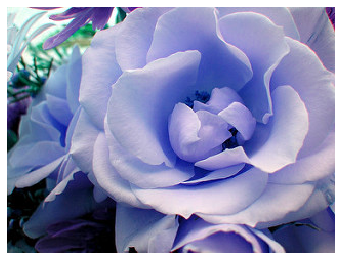

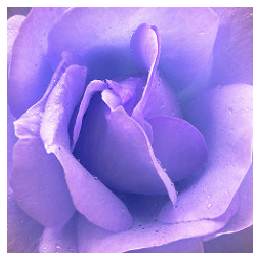

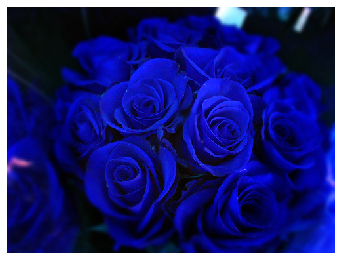

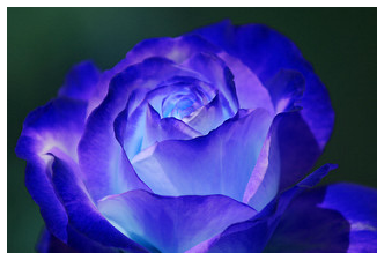

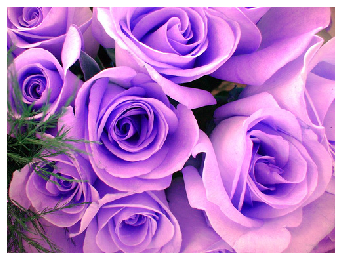

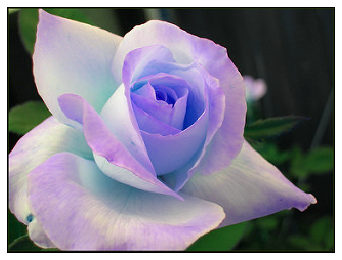

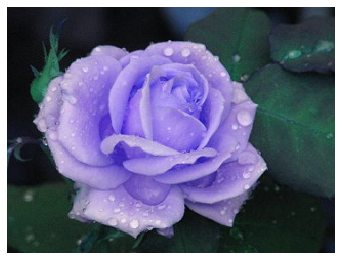

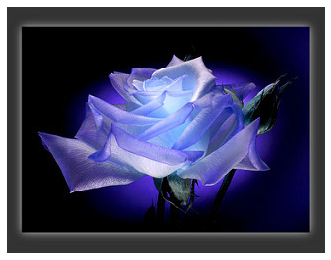

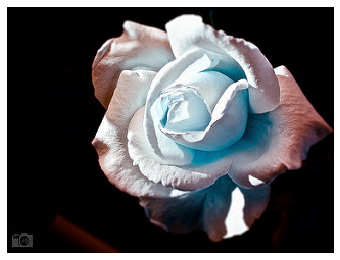

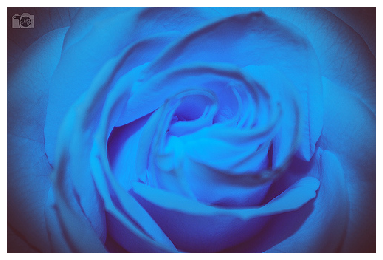

In [21]:
import matplotlib.pyplot as plt
for rose in rose_names:
    path = rose_dir + rose    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    imshow(cv_img) # use skimage imshow to display the image
    plt.axis('off'), show()

In [22]:
#Creating features for the roses
all_features = []
for rose in rose_names:
    path = rose_dir +  rose    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    #create features for machine learning
    nFeatures = (cv_img2.shape[0]*cv_img2.shape[1]*3)
    features = np.reshape(cv_img2, nFeatures)
    all_features.append(features)
    #print(features.shape)
roses = pd.DataFrame(np.array(all_features), index=rose_names)
roses

0      1      2      3      4      5      6      7      8      \
rose1.jpg     212    241    232    232    245    237    223    250    234   
rose10.jpg    118     97    142    121    100    145    125    104    149   
rose2.jpg       8      7     17      8      7     16      7      9     17   
rose3.jpg      31     68     48     31     68     48     31     68     48   
rose4.jpg     230    145    203    229    150    194    203    118    198   
rose5.jpg       0      0     11      0      3      0      0      1      0   
rose6.jpg      18     17     26     19     18     27     18     17     26   
rose7.jpg      51     51     51     51     51     51     51     51     51   
rose8.jpg       0      0      0      0      0      0      0      0      0   
rose9.jpg      62     38     46     62     38     46     63     39     47   

            9      ...  89990  89991  89992  89993  89994  89995  89996  \
rose1.jpg     217  ...    135    128    118    141    129    119    142   
rose10.jpg    125  ...    141    116     98    139    115     97    138   
rose2.jpg       7  ...    250     17     43    251     21     45    251   
rose3.jpg      31  ...    183     59     27    186     61     27    187   
rose4.jpg     190  ...    107    115     37    108    123     49    107   
rose5.jpg       5  ...      2     10     19      0     13     20      7   
rose6.jpg      17  ...     26     15     23     36     16     25     39   
rose7.jpg      51  ...     51     51     51     51     51     51     51   
rose8.jpg       0  ...      0      0      0      0      0      0      0   
rose9.jpg      64  ...     39     60     32     38     62     32     37   

            89997  89998  89999  
rose1.jpg     129    118    138  
rose10.jpg    114     96    135  
rose2.jpg      23     47    253  
rose3.jpg      54     23    184  
rose4.jpg     121     45    103  
rose5.jpg      12     26      0  
rose6.jpg      15     28     44  
rose7.jpg      51     51     51  
rose8.jpg       0      0      0  
rose9.jpg      61     31     36  

[10 rows x 90000 columns]

In [23]:
roses['Labels'] = 'Rose'

In [24]:
roses

0    1    2    3    4    5    6    7    8    9  ...  89991  \
rose1.jpg   212  241  232  232  245  237  223  250  234  217  ...    128   
rose10.jpg  118   97  142  121  100  145  125  104  149  125  ...    116   
rose2.jpg     8    7   17    8    7   16    7    9   17    7  ...     17   
rose3.jpg    31   68   48   31   68   48   31   68   48   31  ...     59   
rose4.jpg   230  145  203  229  150  194  203  118  198  190  ...    115   
rose5.jpg     0    0   11    0    3    0    0    1    0    5  ...     10   
rose6.jpg    18   17   26   19   18   27   18   17   26   17  ...     15   
rose7.jpg    51   51   51   51   51   51   51   51   51   51  ...     51   
rose8.jpg     0    0    0    0    0    0    0    0    0    0  ...      0   
rose9.jpg    62   38   46   62   38   46   63   39   47   64  ...     60   

            89992  89993  89994  89995  89996  89997  89998  89999  Labels  
rose1.jpg     118    141    129    119    142    129    118    138    Rose  
rose10.jpg     98    139    115     97    138    114     96    135    Rose  
rose2.jpg      43    251     21     45    251     23     47    253    Rose  
rose3.jpg      27    186     61     27    187     54     23    184    Rose  
rose4.jpg      37    108    123     49    107    121     45    103    Rose  
rose5.jpg      19      0     13     20      7     12     26      0    Rose  
rose6.jpg      23     36     16     25     39     15     28     44    Rose  
rose7.jpg      51     51     51     51     51     51     51     51    Rose  
rose8.jpg       0      0      0      0      0      0      0      0    Rose  
rose9.jpg      32     38     62     32     37     61     31     36    Rose  

[10 rows x 90001 columns]

### Processing Sunflower

In [25]:
sun_dir = 'C:\\Users\\O.I. ORIMOOGUNJE\\Documents\\Emmanuella Maduakor\\Image_Processing\\flowers\\sunflower\\'

In [26]:
sun_names = []
with os.scandir(sun_dir) as dirs:
    for entry in dirs:
        sun_names.append(entry.name)
print(sun_names)

['sunflower1.jpg', 'sunflower10.jpg', 'sunflower2.jpg', 'sunflower3.jpg', 'sunflower4.jpg', 'sunflower5.jpg', 'sunflower6.jpg', 'sunflower7.jpg', 'sunflower8.jpg', 'sunflower9.jpg']


In [27]:
#creating a numpy array for each image
for sun in sun_names:
    path = sun_dir + sun
    cv_img = cv2.imread(path)   
    print(cv_img.shape)

(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(240, 320, 3)
(375, 500, 3)
(240, 320, 3)
(375, 500, 3)
(240, 207, 3)
(330, 500, 3)
(240, 320, 3)


In [28]:
#resize the images to be of similar size
for sun in sun_names:
    path = sun_dir + sun
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    print(cv_img2.shape) 

(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)


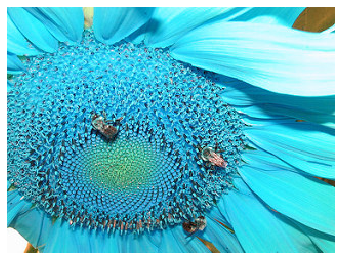

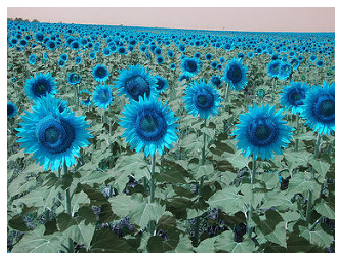

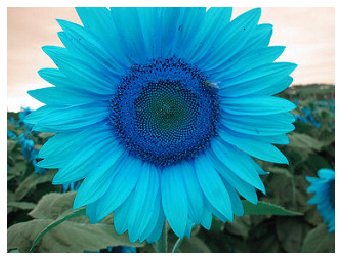

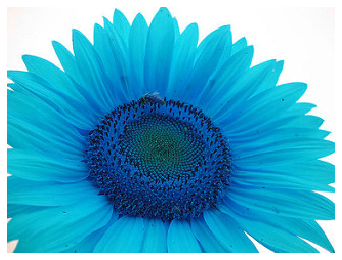

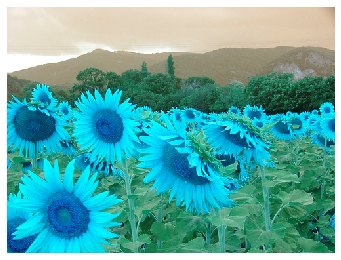

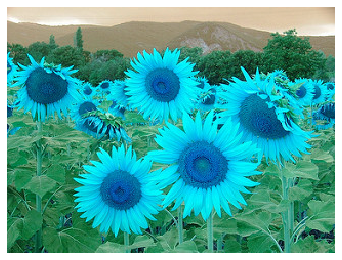

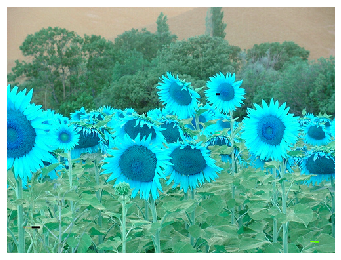

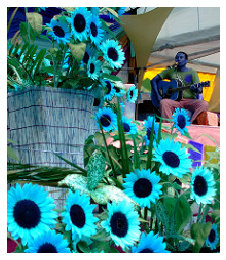

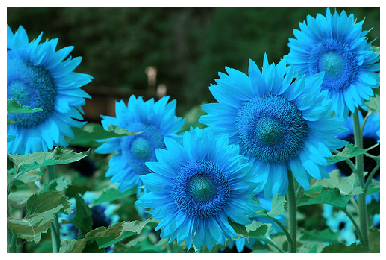

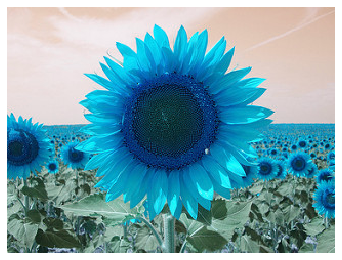

In [29]:
import matplotlib.pyplot as plt
for sun in sun_names:
    path = sun_dir + sun    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    imshow(cv_img) # use skimage imshow to display the image
    plt.axis('off'), show()

In [30]:
#Creating features for the Sunflower
all_features = []
for sun in sun_names:
    path = sun_dir +  sun    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    #create features for machine learning
    nFeatures = (cv_img2.shape[0]*cv_img2.shape[1]*3)
    features = np.reshape(cv_img2, nFeatures)
    all_features.append(features)
    #print(features.shape)
sunflowers = pd.DataFrame(np.array(all_features), index=sun_names)
sunflowers

0      1      2      3      4      5      6      7      \
sunflower1.jpg      67    211    223     84    210    228     84    222   
sunflower10.jpg    215    199    200    215    199    200    215    199   
sunflower2.jpg     221    191    172    221    191    172    223    193   
sunflower3.jpg     251    239    233    251    239    233    252    240   
sunflower4.jpg     235    219    206    236    221    212    238    229   
sunflower5.jpg     215    185    160    218    188    163    222    197   
sunflower6.jpg     185    165    147    187    167    150    187    169   
sunflower7.jpg      15     21     44     14     67      4     21     65   
sunflower8.jpg      42     49     34     39     51     33     39     51   
sunflower9.jpg     232    201    192    233    204    195    230    206   

                 8      9      ...  89990  89991  89992  89993  89994  89995  \
sunflower1.jpg     240     68  ...    205     68    224    213     75    225   
sunflower10.jpg    200    215  ...     53     71     79    108     36     48   
sunflower2.jpg     174    224  ...     40     48     67     48     51     70   
sunflower3.jpg     234    252  ...    243     90    177    187     47    174   
sunflower4.jpg     216    240  ...     83     80    167    129     48    144   
sunflower5.jpg     171    225  ...    101      2    123     72      8    126   
sunflower6.jpg     152    187  ...    134    101    174    136    101    176   
sunflower7.jpg      36      1  ...      0      7      0      0      2      0   
sunflower8.jpg      31     36  ...     65     49     99     45     46     93   
sunflower9.jpg     194    230  ...    142    150    183    168    114    150   

                 89996  89997  89998  89999  
sunflower1.jpg     212     72    223    208  
sunflower10.jpg     58     30     41     31  
sunflower2.jpg      51     44     69     49  
sunflower3.jpg     195      4    116    139  
sunflower4.jpg     107     21    116     79  
sunflower5.jpg      75     49    151    103  
sunflower6.jpg     138    108    179    139  
sunflower7.jpg       6      3      0     11  
sunflower8.jpg      44     49     96     47  
sunflower9.jpg     134    133    166    151  

[10 rows x 90000 columns]

In [31]:
sunflowers['Labels'] = 'Sunflower'

In [32]:
sunflowers

0    1    2    3    4    5    6    7    8    9  ...  89991  \
sunflower1.jpg    67  211  223   84  210  228   84  222  240   68  ...     68   
sunflower10.jpg  215  199  200  215  199  200  215  199  200  215  ...     71   
sunflower2.jpg   221  191  172  221  191  172  223  193  174  224  ...     48   
sunflower3.jpg   251  239  233  251  239  233  252  240  234  252  ...     90   
sunflower4.jpg   235  219  206  236  221  212  238  229  216  240  ...     80   
sunflower5.jpg   215  185  160  218  188  163  222  197  171  225  ...      2   
sunflower6.jpg   185  165  147  187  167  150  187  169  152  187  ...    101   
sunflower7.jpg    15   21   44   14   67    4   21   65   36    1  ...      7   
sunflower8.jpg    42   49   34   39   51   33   39   51   31   36  ...     49   
sunflower9.jpg   232  201  192  233  204  195  230  206  194  230  ...    150   

                 89992  89993  89994  89995  89996  89997  89998  89999  \
sunflower1.jpg     224    213     75    225    212     72    223    208   
sunflower10.jpg     79    108     36     48     58     30     41     31   
sunflower2.jpg      67     48     51     70     51     44     69     49   
sunflower3.jpg     177    187     47    174    195      4    116    139   
sunflower4.jpg     167    129     48    144    107     21    116     79   
sunflower5.jpg     123     72      8    126     75     49    151    103   
sunflower6.jpg     174    136    101    176    138    108    179    139   
sunflower7.jpg       0      0      2      0      6      3      0     11   
sunflower8.jpg      99     45     46     93     44     49     96     47   
sunflower9.jpg     183    168    114    150    134    133    166    151   

                    Labels  
sunflower1.jpg   Sunflower  
sunflower10.jpg  Sunflower  
sunflower2.jpg   Sunflower  
sunflower3.jpg   Sunflower  
sunflower4.jpg   Sunflower  
sunflower5.jpg   Sunflower  
sunflower6.jpg   Sunflower  
sunflower7.jpg   Sunflower  
sunflower8.jpg   Sunflower  
sunflower9.jpg   Sunflower  

[10 rows x 90001 columns]

### Processing Tulips

In [33]:
tulip_dir = 'C:\\Users\\O.I. ORIMOOGUNJE\\Documents\\Emmanuella Maduakor\\Image_Processing\\flowers\\tulip\\'

In [34]:
tulip_names = []
with os.scandir(tulip_dir) as dirs:
    for entry in dirs:
        tulip_names.append(entry.name)
print(tulip_names)

['tulip1.jpg', 'tulip10.jpg', 'tulip2.jpg', 'tulip3.jpg', 'tulip4.jpg', 'tulip5.jpg', 'tulip6.jpg', 'tulip7.jpg', 'tulip8.jpg', 'tulip9.jpg']


In [35]:
#creating a numpy array for each image
for tulip in tulip_names:
    path = tulip_dir + tulip
    cv_img = cv2.imread(path)   
    print(cv_img.shape)

(232, 320, 3)
(331, 500, 3)
(241, 320, 3)
(240, 320, 3)
(375, 500, 3)
(375, 500, 3)
(380, 500, 3)
(368, 500, 3)
(375, 500, 3)
(333, 500, 3)


In [36]:
#resize the images to be of similar size
for tulip in tulip_names:
    path = tulip_dir + tulip
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    print(cv_img2.shape)

(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)
(150, 200, 3)


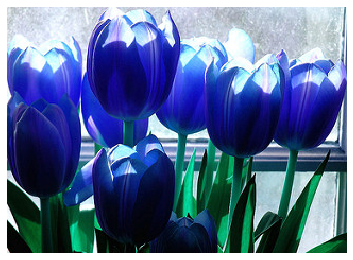

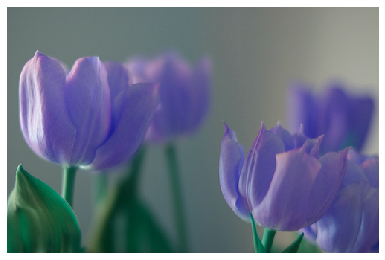

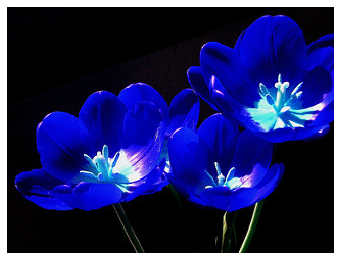

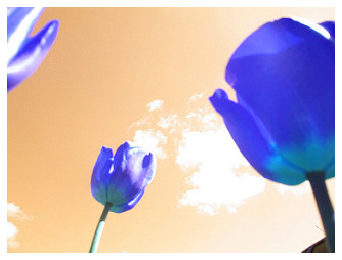

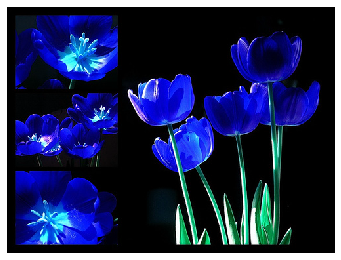

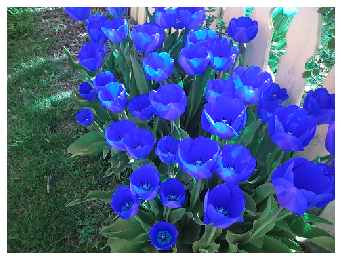

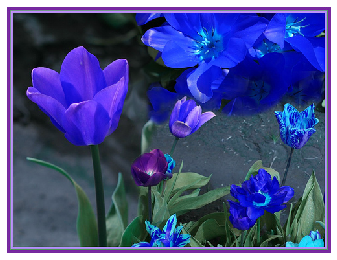

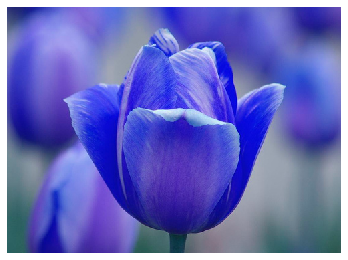

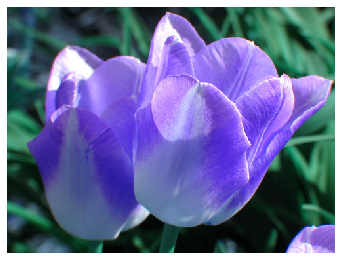

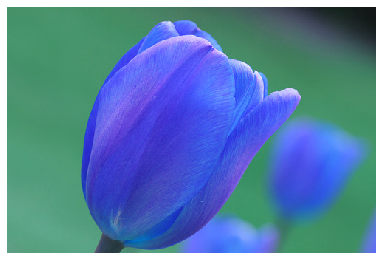

In [37]:
import matplotlib.pyplot as plt
for tulip in tulip_names:
    path = tulip_dir + tulip    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    imshow(cv_img) # use skimage imshow to display the image
    plt.axis('off'), show()

In [38]:
#Creating features for the Sunflower
all_features = []
for tulip in tulip_names:
    path = tulip_dir +  tulip    
    cv_img = cv2.imread(path)   
    cv_img2 = cv2.resize(cv_img, (200, 150), interpolation=cv2.INTER_NEAREST)    
    #create features for machine learning
    nFeatures = (cv_img2.shape[0]*cv_img2.shape[1]*3)
    features = np.reshape(cv_img2, nFeatures)
    all_features.append(features)
    #print(features.shape)
tulips = pd.DataFrame(np.array(all_features), index=tulip_names)
tulips

0      1      2      3      4      5      6      7      8      \
tulip1.jpg     219    228    231    198    205    208    203    207    212   
tulip10.jpg     95    109    107     96    110    109     95    109    107   
tulip2.jpg       0      1      2      0      0      4      0      0      4   
tulip3.jpg     179    176    255    181    176    251    193    184    247   
tulip4.jpg       1      1      1      1      1      1      1      1      1   
tulip5.jpg      55    160    111    107    160    121    106    165    127   
tulip6.jpg     120     41    162    118     41    163    113     39    165   
tulip7.jpg      48     52    123     44     47    122     41     42    122   
tulip8.jpg      32     73     68     28     73     64     21     71     61   
tulip9.jpg      70    146    104     70    146    104     69    147    106   

             9      ...  89990  89991  89992  89993  89994  89995  89996  \
tulip1.jpg     180  ...     19      1     37     20      3     37     20   
tulip10.jpg     96  ...    106     51     53    107     53     50    105   
tulip2.jpg       0  ...      0      0      0      0      0      0      0   
tulip3.jpg     198  ...     51     60     67     62     51     57     62   
tulip4.jpg       1  ...      0      0      0      0      0      0      0   
tulip5.jpg      30  ...     45     54     74     61     77    108     71   
tulip6.jpg     119  ...    156    118     44    156    118     44    156   
tulip7.jpg      37  ...     80     42     86     79     46     86     81   
tulip8.jpg      21  ...    240    157    138    235    141    126    217   
tulip9.jpg      68  ...    218     95    116    225     94    110    233   

             89997  89998  89999  
tulip1.jpg       6     35     20  
tulip10.jpg     55     53    105  
tulip2.jpg       0      0      0  
tulip3.jpg      32     46     52  
tulip4.jpg       0      0      0  
tulip5.jpg      66     95     62  
tulip6.jpg     117     42    158  
tulip7.jpg      49     89     84  
tulip8.jpg     130    104    198  
tulip9.jpg      92    111    238  

[10 rows x 90000 columns]

In [39]:
tulips['Labels'] = 'Tulip'

In [40]:
tulips

0    1    2    3    4    5    6    7    8    9  ...  89991  \
tulip1.jpg   219  228  231  198  205  208  203  207  212  180  ...      1   
tulip10.jpg   95  109  107   96  110  109   95  109  107   96  ...     51   
tulip2.jpg     0    1    2    0    0    4    0    0    4    0  ...      0   
tulip3.jpg   179  176  255  181  176  251  193  184  247  198  ...     60   
tulip4.jpg     1    1    1    1    1    1    1    1    1    1  ...      0   
tulip5.jpg    55  160  111  107  160  121  106  165  127   30  ...     54   
tulip6.jpg   120   41  162  118   41  163  113   39  165  119  ...    118   
tulip7.jpg    48   52  123   44   47  122   41   42  122   37  ...     42   
tulip8.jpg    32   73   68   28   73   64   21   71   61   21  ...    157   
tulip9.jpg    70  146  104   70  146  104   69  147  106   68  ...     95   

             89992  89993  89994  89995  89996  89997  89998  89999  Labels  
tulip1.jpg      37     20      3     37     20      6     35     20   Tulip  
tulip10.jpg     53    107     53     50    105     55     53    105   Tulip  
tulip2.jpg       0      0      0      0      0      0      0      0   Tulip  
tulip3.jpg      67     62     51     57     62     32     46     52   Tulip  
tulip4.jpg       0      0      0      0      0      0      0      0   Tulip  
tulip5.jpg      74     61     77    108     71     66     95     62   Tulip  
tulip6.jpg      44    156    118     44    156    117     42    158   Tulip  
tulip7.jpg      86     79     46     86     81     49     89     84   Tulip  
tulip8.jpg     138    235    141    126    217    130    104    198   Tulip  
tulip9.jpg     116    225     94    110    233     92    111    238   Tulip  

[10 rows x 90001 columns]

## Concatenating all three data frame to create a dataset ready for machine learning

In [41]:
Flowers = [roses, sunflowers,tulips]
Flowers_dataset = pd.concat(Flowers)
display(Flowers_dataset)

0    1    2    3    4    5    6    7    8    9  ...  89991  \
rose1.jpg        212  241  232  232  245  237  223  250  234  217  ...    128   
rose10.jpg       118   97  142  121  100  145  125  104  149  125  ...    116   
rose2.jpg          8    7   17    8    7   16    7    9   17    7  ...     17   
rose3.jpg         31   68   48   31   68   48   31   68   48   31  ...     59   
rose4.jpg        230  145  203  229  150  194  203  118  198  190  ...    115   
rose5.jpg          0    0   11    0    3    0    0    1    0    5  ...     10   
rose6.jpg         18   17   26   19   18   27   18   17   26   17  ...     15   
rose7.jpg         51   51   51   51   51   51   51   51   51   51  ...     51   
rose8.jpg          0    0    0    0    0    0    0    0    0    0  ...      0   
rose9.jpg         62   38   46   62   38   46   63   39   47   64  ...     60   
sunflower1.jpg    67  211  223   84  210  228   84  222  240   68  ...     68   
sunflower10.jpg  215  199  200  215  199  200  215  199  200  215  ...     71   
sunflower2.jpg   221  191  172  221  191  172  223  193  174  224  ...     48   
sunflower3.jpg   251  239  233  251  239  233  252  240  234  252  ...     90   
sunflower4.jpg   235  219  206  236  221  212  238  229  216  240  ...     80   
sunflower5.jpg   215  185  160  218  188  163  222  197  171  225  ...      2   
sunflower6.jpg   185  165  147  187  167  150  187  169  152  187  ...    101   
sunflower7.jpg    15   21   44   14   67    4   21   65   36    1  ...      7   
sunflower8.jpg    42   49   34   39   51   33   39   51   31   36  ...     49   
sunflower9.jpg   232  201  192  233  204  195  230  206  194  230  ...    150   
tulip1.jpg       219  228  231  198  205  208  203  207  212  180  ...      1   
tulip10.jpg       95  109  107   96  110  109   95  109  107   96  ...     51   
tulip2.jpg         0    1    2    0    0    4    0    0    4    0  ...      0   
tulip3.jpg       179  176  255  181  176  251  193  184  247  198  ...     60   
tulip4.jpg         1    1    1    1    1    1    1    1    1    1  ...      0   
tulip5.jpg        55  160  111  107  160  121  106  165  127   30  ...     54   
tulip6.jpg       120   41  162  118   41  163  113   39  165  119  ...    118   
tulip7.jpg        48   52  123   44   47  122   41   42  122   37  ...     42   
tulip8.jpg        32   73   68   28   73   64   21   71   61   21  ...    157   
tulip9.jpg        70  146  104   70  146  104   69  147  106   68  ...     95   

                 89992  89993  89994  89995  89996  89997  89998  89999  \
rose1.jpg          118    141    129    119    142    129    118    138   
rose10.jpg          98    139    115     97    138    114     96    135   
rose2.jpg           43    251     21     45    251     23     47    253   
rose3.jpg           27    186     61     27    187     54     23    184   
rose4.jpg           37    108    123     49    107    121     45    103   
rose5.jpg           19      0     13     20      7     12     26      0   
rose6.jpg           23     36     16     25     39     15     28     44   
rose7.jpg           51     51     51     51     51     51     51     51   
rose8.jpg            0      0      0      0      0      0      0      0   
rose9.jpg           32     38     62     32     37     61     31     36   
sunflower1.jpg     224    213     75    225    212     72    223    208   
sunflower10.jpg     79    108     36     48     58     30     41     31   
sunflower2.jpg      67     48     51     70     51     44     69     49   
sunflower3.jpg     177    187     47    174    195      4    116    139   
sunflower4.jpg     167    129     48    144    107     21    116     79   
sunflower5.jpg     123     72      8    126     75     49    151    103   
sunflower6.jpg     174    136    101    176    138    108    179    139   
sunflower7.jpg       0      0      2      0      6      3      0     11   
sunflower8.jpg      99     45     46     93     44     49     96     47   
sunflow

## Number 3

#### Reading in the review file and storing in a list

In [42]:
my_reviews = []
with open('14879727.txt', 'rt') as reviews:
    for line in reviews:
        my_reviews.append(line.rstrip('\n'))
        print(line)

text|label

The book is great, I recommend it to anyone like science|	1

I baught that book. I like it too much|	1

I do not recommend this book. It is very complicated|	0

The book contains good information. I recommend it|	1

The book does not contain the most updated information|	0

The book is affordable to student. I can buy one|	1

I like that book. It contains too much information and science|	1

The book is too much technical and complicated|	0

I like the book because it is illustrated and affordable|	1

I recommend this book to any one like science|	1

This book is good for students|	1

The students can use this book as a reference|	1

The book is affordable but complicated|1

I will buy this book|1

The book is expensive for me|1







#### Removing the '|' mark so as to be able to get the labels and the texts

In [43]:
result = [element.split('|') for element in my_reviews]

In [44]:
result

[['text', 'label'],
 ['The book is great, I recommend it to anyone like science', '\t1'],
 ['I baught that book. I like it too much', '\t1'],
 ['I do not recommend this book. It is very complicated', '\t0'],
 ['The book contains good information. I recommend it', '\t1'],
 ['The book does not contain the most updated information', '\t0'],
 ['The book is affordable to student. I can buy one', '\t1'],
 ['I like that book. It contains too much information and science', '\t1'],
 ['The book is too much technical and complicated', '\t0'],
 ['I like the book because it is illustrated and affordable', '\t1'],
 ['I recommend this book to any one like science', '\t1'],
 ['This book is good for students', '\t1'],
 ['The students can use this book as a reference', '\t1'],
 ['The book is affordable but complicated', '1'],
 ['I will buy this book', '1'],
 ['The book is expensive for me', '1'],
 [''],
 ['']]

#### Removing the last two elements that contains nothing

In [45]:
result.pop()
result.pop()

['']

In [46]:
result

[['text', 'label'],
 ['The book is great, I recommend it to anyone like science', '\t1'],
 ['I baught that book. I like it too much', '\t1'],
 ['I do not recommend this book. It is very complicated', '\t0'],
 ['The book contains good information. I recommend it', '\t1'],
 ['The book does not contain the most updated information', '\t0'],
 ['The book is affordable to student. I can buy one', '\t1'],
 ['I like that book. It contains too much information and science', '\t1'],
 ['The book is too much technical and complicated', '\t0'],
 ['I like the book because it is illustrated and affordable', '\t1'],
 ['I recommend this book to any one like science', '\t1'],
 ['This book is good for students', '\t1'],
 ['The students can use this book as a reference', '\t1'],
 ['The book is affordable but complicated', '1'],
 ['I will buy this book', '1'],
 ['The book is expensive for me', '1']]

In [47]:
len(result)

16

In [48]:
labels = []
texts = []
for i in range(16):
    labels.append(result[i][1])
    texts.append(result[i][0])
print(labels)
print(texts)
    

['label', '\t1', '\t1', '\t0', '\t1', '\t0', '\t1', '\t1', '\t0', '\t1', '\t1', '\t1', '\t1', '1', '1', '1']
['text', 'The book is great, I recommend it to anyone like science', 'I baught that book. I like it too much', 'I do not recommend this book. It is very complicated', 'The book contains good information. I recommend it', 'The book does not contain the most updated information', 'The book is affordable to student. I can buy one', 'I like that book. It contains too much information and science', 'The book is too much technical and complicated', 'I like the book because it is illustrated and affordable', 'I recommend this book to any one like science', 'This book is good for students', 'The students can use this book as a reference', 'The book is affordable but complicated', 'I will buy this book', 'The book is expensive for me']


In [49]:
# Removing text and label headig at the top
texts.remove('text')
labels.remove('label')

In [50]:
reviews = pd.DataFrame(list(zip(texts,labels)), columns = ['texts','labels'])

In [51]:
reviews

texts labels
0   The book is great, I recommend it to anyone li...    \t1
1              I baught that book. I like it too much    \t1
2   I do not recommend this book. It is very compl...    \t0
3   The book contains good information. I recommen...    \t1
4   The book does not contain the most updated inf...    \t0
5    The book is affordable to student. I can buy one    \t1
6   I like that book. It contains too much informa...    \t1
7      The book is too much technical and complicated    \t0
8   I like the book because it is illustrated and ...    \t1
9       I recommend this book to any one like science    \t1
10                     This book is good for students    \t1
11      The students can use this book as a reference    \t1
12             The book is affordable but complicated      1
13                               I will buy this book      1
14                       The book is expensive for me      1

In [52]:
reviews['labels'].unique()

array(['\t1', '\t0', '1'], dtype=object)

In [53]:
#Cleaning up the labels column
reviews['labels'] = reviews['labels'].replace('\t1',1)
reviews['labels'] = reviews['labels'].replace('\t0',0)

In [54]:
reviews

texts labels
0   The book is great, I recommend it to anyone li...      1
1              I baught that book. I like it too much      1
2   I do not recommend this book. It is very compl...      0
3   The book contains good information. I recommen...      1
4   The book does not contain the most updated inf...      0
5    The book is affordable to student. I can buy one      1
6   I like that book. It contains too much informa...      1
7      The book is too much technical and complicated      0
8   I like the book because it is illustrated and ...      1
9       I recommend this book to any one like science      1
10                     This book is good for students      1
11      The students can use this book as a reference      1
12             The book is affordable but complicated      1
13                               I will buy this book      1
14                       The book is expensive for me      1

In [55]:
[reviews['texts']]

[0     The book is great, I recommend it to anyone li...
 1                I baught that book. I like it too much
 2     I do not recommend this book. It is very compl...
 3     The book contains good information. I recommen...
 4     The book does not contain the most updated inf...
 5      The book is affordable to student. I can buy one
 6     I like that book. It contains too much informa...
 7        The book is too much technical and complicated
 8     I like the book because it is illustrated and ...
 9         I recommend this book to any one like science
 10                       This book is good for students
 11        The students can use this book as a reference
 12               The book is affordable but complicated
 13                                 I will buy this book
 14                         The book is expensive for me
 Name: texts, dtype: object]

In [56]:
corpus = [text for text in reviews['texts']]

In [57]:
corpus

['The book is great, I recommend it to anyone like science',
 'I baught that book. I like it too much',
 'I do not recommend this book. It is very complicated',
 'The book contains good information. I recommend it',
 'The book does not contain the most updated information',
 'The book is affordable to student. I can buy one',
 'I like that book. It contains too much information and science',
 'The book is too much technical and complicated',
 'I like the book because it is illustrated and affordable',
 'I recommend this book to any one like science',
 'This book is good for students',
 'The students can use this book as a reference',
 'The book is affordable but complicated',
 'I will buy this book',
 'The book is expensive for me']

In [58]:
len(corpus)

15

In [59]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
#Vectrorize the vocabulary
doc_vec = vectorizer.fit_transform(corpus)

In [60]:
doc_vec

<15x45 sparse matrix of type '<class 'numpy.int64'>'
	with 115 stored elements in Compressed Sparse Row format>

#### 3i. Creating Bag of Words(BOW) features from the text and also adding the label for each row

In [61]:
bow_df = pd.DataFrame(doc_vec.toarray().transpose(), index=vectorizer.get_feature_names())

In [62]:
bow_df

0   1   2   3   4   5   6   7   8   9   10  11  12  13  14
affordable    0   0   0   0   0   1   0   0   1   0   0   0   1   0   0
and           0   0   0   0   0   0   1   1   1   0   0   0   0   0   0
any           0   0   0   0   0   0   0   0   0   1   0   0   0   0   0
anyone        1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
as            0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
baught        0   1   0   0   0   0   0   0   0   0   0   0   0   0   0
because       0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
book          1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
but           0   0   0   0   0   0   0   0   0   0   0   0   1   0   0
buy           0   0   0   0   0   1   0   0   0   0   0   0   0   1   0
can           0   0   0   0   0   1   0   0   0   0   0   1   0   0   0
complicated   0   0   1   0   0   0   0   1   0   0   0   0   1   0   0
contain       0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
contains      0   0   0   1   0   0   1   0   0   0   0   0   0   0   0
do            0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
does          0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
expensive     0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
for           0   0   0   0   0   0   0   0   0   0   1   0   0   0   1
good          0   0   0   1   0   0   0   0   0   0   1   0   0   0   0
great         1   0   0   0   0   0   0   0   0   0   0   0   0   0   0
illustrated   0   0   0   0   0   0   0   0   1   0   0   0   0   0   0
information   0   0   0   1   1   0   1   0   0   0   0   0   0   0   0
is            1   0   1   0   0   1   0   1   1   0   1   0   1   0   1
it            1   1   1   1   0   0   1   0   1   0   0   0   0   0   0
like          1   1   0   0   0   0   1   0   1   1   0   0   0   0   0
me            0   0   0   0   0   0   0   0   0   0   0   0   0   0   1
most          0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
much          0   1   0   0   0   0   1   1   0   0   0   0   0   0   0
not           0   0   1   0   1   0   0   0   0   0   0   0   0   0   0
one           0   0   0   0   0   1   0   0   0   1   0   0   0   0   0
recommend     1   0   1   1   0   0   0   0   0   1   0   0   0   0   0
reference     0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
science       1   0   0   0   0   0   1   0   0   1   0   0   0   0   0
student       0   0   0   0   0   1   0   0   0   0   0   0   0   0   0
students      0   0   0   0   0   0   0   0   0   0   1   1   0   0   0
technical     0   0   0   0   0   0   0   1   0   0   0   0   0   0   0
that          0   1   0   0   0   0   1   0   0   0   0   0   0   0   0
the           1   0   0   1   2   1   0   1   1   0   0   1   1   0   1
this          0   0   1   0   0   0   0   0   0   1   1   1   0   1   0
to            1   0   0   0   0   1   0   0   0   1   0   0   0   0   0
too           0   1   0   0   0   0   1   1   0   0   0   0   0   0   0
updated       0   0   0   0   1   0   0   0   0   0   0   0   0   0   0
use           0   0   0   0   0   0   0   0   0   0   0   1   0   0   0
very          0   0   1   0   0   0   0   0   0   0   0   0   0   0   0
will          0   0   0   0   0   0   0   0   0   0   0   0   0   1   0

In [63]:
# making a Term document matrix
bow_df.columns = ['review'+str(i+1) for i in range(len(corpus))]
bow_df

review1  review2  review3  review4  review5  review6  review7  \
affordable         0        0        0        0        0        1        0   
and                0        0        0        0        0        0        1   
any                0        0        0        0        0        0        0   
anyone             1        0        0        0        0        0        0   
as                 0        0        0        0        0        0        0   
baught             0        1        0        0        0        0        0   
because            0        0        0        0        0        0        0   
book               1        1        1        1        1        1        1   
but                0        0        0        0        0        0        0   
buy                0        0        0        0        0        1        0   
can                0        0        0        0        0        1        0   
complicated        0        0        1        0        0        0        0   
contain            0        0        0        0        1        0        0   
contains           0        0        0        1        0        0        1   
do                 0        0        1        0        0        0        0   
does               0        0        0        0        1        0        0   
expensive          0        0        0        0        0        0        0   
for                0        0        0        0        0        0        0   
good               0        0        0        1        0        0        0   
great              1        0        0        0        0        0        0   
illustrated        0        0        0        0        0        0        0   
information        0        0        0        1        1        0        1   
is                 1        0        1        0        0        1        0   
it                 1        1        1        1        0        0        1   
like               1        1        0        0        0        0        1   
me                 0        0        0        0        0        0        0   
most               0        0        0        0        1        0        0   
much               0        1        0        0        0        0        1   
not                0        0        1        0        1        0        0   
one                0        0        0        0        0        1        0   
recommend          1        0        1        1        0        0        0   
reference          0        0        0        0        0        0        0   
science            1        0        0        0        0        0        1   
student            0        0        0        0        0        1        0   
students           0        0        0        0        0        0        0   
technical          0        0        0        0        0        0        0   
that               0        1        0        0        0        0        1   
the                1        0        0        1        2        1        0   
this               0        0        1        0        0        0        0   
to                 1        0        0        0        0        1        0   
too                0        1        0        0        0        0        1   
updated            0        0        0        0        1        0        0   
use                0        0        0        0        0        0        0   
very               0        0        1        0        0        0        0   
will               0        0        0        0        0        0        0   

             review8  review9  review10  review11  review12  review13  \
affordable         0        1         0         0         0         1   
and                1        1         0         0         0         0   
any                0        0         1         0         0         0   
anyone             0        0         0         0         0         0   
as                 0        0         0         0         1

###### creating features for Machine Learning


In [64]:
BOW = bow_df.T
BOW

affordable  and  any  anyone  as  baught  because  book  but  buy  \
review1            0    0    0       1   0       0        0     1    0    0   
review2            0    0    0       0   0       1        0     1    0    0   
review3            0    0    0       0   0       0        0     1    0    0   
review4            0    0    0       0   0       0        0     1    0    0   
review5            0    0    0       0   0       0        0     1    0    0   
review6            1    0    0       0   0       0        0     1    0    1   
review7            0    1    0       0   0       0        0     1    0    0   
review8            0    1    0       0   0       0        0     1    0    0   
review9            1    1    0       0   0       0        1     1    0    0   
review10           0    0    1       0   0       0        0     1    0    0   
review11           0    0    0       0   0       0        0     1    0    0   
review12           0    0    0       0   1       0        0     1    0    0   
review13           1    0    0       0   0       0        0     1    1    0   
review14           0    0    0       0   0       0        0     1    0    1   
review15           0    0    0       0   0       0        0     1    0    0   

          ...  technical  that  the  this  to  too  updated  use  very  will  
review1   ...          0     0    1     0   1    0        0    0     0     0  
review2   ...          0     1    0     0   0    1        0    0     0     0  
review3   ...          0     0    0     1   0    0        0    0     1     0  
review4   ...          0     0    1     0   0    0        0    0     0     0  
review5   ...          0     0    2     0   0    0        1    0     0     0  
review6   ...          0     0    1     0   1    0        0    0     0     0  
review7   ...          0     1    0     0   0    1        0    0     0     0  
review8   ...          1     0    1     0   0    1        0    0     0     0  
review9   ...          0     0    1     0   0    0        0    0     0     0  
review10  ...          0     0    0     1   1    0        0    0     0     0  
review11  ...          0     0    0     1   0    0        0    0     0     0  
review12  ...          0     0    1     1   0    0        0    1     0     0  
review13  ...          0     0    1     0   0    0        0    0     0     0  
review14  ...          0     0    0     1   0    0        0    0     0     1  
review15  ...          0     0    1     0   0    0        0    0     0     0  

[15 rows x 45 columns]

###### adding there labels to it

In [65]:
reviews['labels']

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: labels, dtype: object

In [66]:
BOW['labels'] = [i for i in reviews['labels']]
BOW

affordable  and  any  anyone  as  baught  because  book  but  buy  \
review1            0    0    0       1   0       0        0     1    0    0   
review2            0    0    0       0   0       1        0     1    0    0   
review3            0    0    0       0   0       0        0     1    0    0   
review4            0    0    0       0   0       0        0     1    0    0   
review5            0    0    0       0   0       0        0     1    0    0   
review6            1    0    0       0   0       0        0     1    0    1   
review7            0    1    0       0   0       0        0     1    0    0   
review8            0    1    0       0   0       0        0     1    0    0   
review9            1    1    0       0   0       0        1     1    0    0   
review10           0    0    1       0   0       0        0     1    0    0   
review11           0    0    0       0   0       0        0     1    0    0   
review12           0    0    0       0   1       0        0     1    0    0   
review13           1    0    0       0   0       0        0     1    1    0   
review14           0    0    0       0   0       0        0     1    0    1   
review15           0    0    0       0   0       0        0     1    0    0   

          ...  that  the  this  to  too  updated  use  very  will  labels  
review1   ...     0    1     0   1    0        0    0     0     0       1  
review2   ...     1    0     0   0    1        0    0     0     0       1  
review3   ...     0    0     1   0    0        0    0     1     0       0  
review4   ...     0    1     0   0    0        0    0     0     0       1  
review5   ...     0    2     0   0    0        1    0     0     0       0  
review6   ...     0    1     0   1    0        0    0     0     0       1  
review7   ...     1    0     0   0    1        0    0     0     0       1  
review8   ...     0    1     0   0    1        0    0     0     0       0  
review9   ...     0    1     0   0    0        0    0     0     0       1  
review10  ...     0    0     1   1    0        0    0     0     0       1  
review11  ...     0    0     1   0    0        0    0     0     0       1  
review12  ...     0    1     1   0    0        0    1     0     0       1  
review13  ...     0    1     0   0    0        0    0     0     0       1  
review14  ...     0    0     1   0    0        0    0     0     1       1  
review15  ...     0    1     0   0    0        0    0     0     0       1  

[15 rows x 46 columns]

#### 3ii. Creating a FT-IDF features from the text and adding a label for each review(row)

In [67]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [68]:
vectorizer = TfidfVectorizer()

In [69]:
doc_vec2 = vectorizer.fit_transform(corpus)

In [70]:
doc_vec2 

<15x45 sparse matrix of type '<class 'numpy.float64'>'
	with 115 stored elements in Compressed Sparse Row format>

In [71]:
tfidf_df = pd.DataFrame(doc_vec2.toarray().transpose(), index=vectorizer.get_feature_names())
tfidf_df.columns =  ['review'+str(i+1) for i in range(len(corpus))]
tfidf_df

review1   review2   review3   review4   review5   review6  \
affordable   0.000000  0.000000  0.000000  0.000000  0.000000  0.344558   
and          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
any          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
anyone       0.444771  0.000000  0.000000  0.000000  0.000000  0.000000   
as           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
baught       0.000000  0.511239  0.000000  0.000000  0.000000  0.000000   
because      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
book         0.144432  0.166017  0.145506  0.179110  0.128650  0.144390   
but          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
buy          0.000000  0.000000  0.000000  0.000000  0.000000  0.386096   
can          0.000000  0.000000  0.000000  0.000000  0.000000  0.386096   
complicated  0.000000  0.000000  0.347221  0.000000  0.000000  0.000000   
contain      0.000000  0.000000  0.000000  0.000000  0.396170  0.000000   
contains     0.000000  0.000000  0.000000  0.478937  0.000000  0.000000   
do           0.000000  0.000000  0.448079  0.000000  0.000000  0.000000   
does         0.000000  0.000000  0.000000  0.000000  0.396170  0.000000   
expensive    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
for          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
good         0.000000  0.000000  0.000000  0.478937  0.000000  0.000000   
great        0.444771  0.000000  0.000000  0.000000  0.000000  0.000000   
illustrated  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
information  0.000000  0.000000  0.000000  0.427410  0.306997  0.000000   
is           0.227533  0.000000  0.229226  0.000000  0.000000  0.227467   
it           0.263831  0.303260  0.265794  0.327177  0.000000  0.000000   
like         0.286096  0.328851  0.000000  0.000000  0.000000  0.000000   
me           0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
most         0.000000  0.000000  0.000000  0.000000  0.396170  0.000000   
much         0.000000  0.396165  0.000000  0.000000  0.000000  0.000000   
not          0.000000  0.000000  0.389081  0.000000  0.344007  0.000000   
one          0.000000  0.000000  0.000000  0.000000  0.000000  0.386096   
recommend    0.312429  0.000000  0.314752  0.387443  0.000000  0.000000   
reference    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
science      0.344658  0.000000  0.000000  0.000000  0.000000  0.000000   
student      0.000000  0.000000  0.000000  0.000000  0.000000  0.444642   
students     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
technical    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
that         0.000000  0.443925  0.000000  0.000000  0.000000  0.000000   
the          0.212316  0.000000  0.000000  0.263293  0.378232  0.212254   
this         0.000000  0.000000  0.288223  0.000000  0.000000  0.000000   
to           0.344658  0.000000  0.000000  0.000000  0.000000  0.344558   
too          0.000000  0.396165  0.000000  0.000000  0.000000  0.000000   
updated      0.000000  0.000000  0.000000  0.000000  0.396170  0.000000   
use          0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
very         0.000000  0.000000  0.448079  0.000000  0.000000  0.000000   
will         0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

              review7   review8   review9  review10  review11  review12  \
affordable   0.000000  0.000000  0.362820  0.000000  0.000000  0.000000   
and          0.334041  0.387602  0.362820  0.000000  0.000000  0.000000   
any          0.000000  0.000000  0.000000  0.477743  0.000000  0.000000   
anyone       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
as           0.000000  0.000000  0.000000  0.000000  0.000000  0.436225   
baught       0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
because      0.000000  0.000000  0.468

In [72]:
tf_df = tfidf_df.T
tf_df

affordable       and       any    anyone        as    baught  \
review1     0.000000  0.000000  0.000000  0.444771  0.000000  0.000000   
review2     0.000000  0.000000  0.000000  0.000000  0.000000  0.511239   
review3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review6     0.344558  0.000000  0.000000  0.000000  0.000000  0.000000   
review7     0.000000  0.334041  0.000000  0.000000  0.000000  0.000000   
review8     0.000000  0.387602  0.000000  0.000000  0.000000  0.000000   
review9     0.362820  0.362820  0.000000  0.000000  0.000000  0.000000   
review10    0.000000  0.000000  0.477743  0.000000  0.000000  0.000000   
review11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review12    0.000000  0.000000  0.000000  0.000000  0.436225  0.000000   
review13    0.463429  0.000000  0.000000  0.000000  0.000000  0.000000   
review14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review15    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           because      book       but       buy  ...  technical      that  \
review1   0.000000  0.144432  0.000000  0.000000  ...   0.000000  0.000000   
review2   0.000000  0.166017  0.000000  0.000000  ...   0.000000  0.443925   
review3   0.000000  0.145506  0.000000  0.000000  ...   0.000000  0.000000   
review4   0.000000  0.179110  0.000000  0.000000  ...   0.000000  0.000000   
review5   0.000000  0.128650  0.000000  0.000000  ...   0.000000  0.000000   
review6   0.000000  0.144390  0.000000  0.386096  ...   0.000000  0.000000   
review7   0.000000  0.139983  0.000000  0.000000  ...   0.000000  0.374311   
review8   0.000000  0.162428  0.000000  0.000000  ...   0.500189  0.000000   
review9   0.468209  0.152043  0.000000  0.000000  ...   0.000000  0.000000   
review10  0.000000  0.155139  0.000000  0.000000  ...   0.000000  0.000000   
review11  0.000000  0.186158  0.000000  0.000000  ...   0.000000  0.000000   
review12  0.000000  0.141657  0.000000  0.000000  ...   0.000000  0.000000   
review13  0.000000  0.194204  0.598041  0.000000  ...   0.000000  0.000000   
review14  0.000000  0.215381  0.000000  0.575924  ...   0.000000  0.000000   
review15  0.000000  0.177447  0.000000  0.000000  ...   0.000000  0.000000   

               the      this        to       too  updated       use      very  \
review1   0.212316  0.000000  0.344658  0.000000  0.00000  0.000000  0.000000   
review2   0.000000  0.000000  0.000000  0.396165  0.00000  0.000000  0.000000   
review3   0.000000  0.288223  0.000000  0.000000  0.00000  0.000000  0.448079   
review4   0.263293  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
review5   0.378232  0.000000  0.000000  0.000000  0.39617  0.000000  0.000000   
review6   0.212254  0.000000  0.344558  0.000000  0.00000  0.000000  0.000000   
review7   0.000000  0.000000  0.000000  0.334041  0.00000  0.000000  0.000000   
review8   0.238770  0.000000  0.000000  0.387602  0.00000  0.000000  0.000000   
review9   0.223504  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
review10  0.000000  0.307305  0.370208  0.000000  0.00000  0.000000  0.000000   
review11  0.000000  0.368748  0.000000  0.000000  0.00000  0.000000  0.000000   
review12  0.208236  0.280598  0.000000  0.000000  0.00000  0.436225  0.000000   
review13  0.285481  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   
review14  0.000000  0.426633  0.000000  0.000000  0.00000  0.000000  0.000000   
review15  0.260848  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000   

              will  
review1   0.000000  
review2   0.000000  
review3   0.000000  
review4   0.000000  
review5   0.000000  
review6   0.000000  
review7   0.000000  
review8   0.000000  
review9   0.000000  
review10  0.000000  
review11  0.000000  
review12  0.000000  
review

###### adding the labels

In [73]:
reviews['labels']

0     1
1     1
2     0
3     1
4     0
5     1
6     1
7     0
8     1
9     1
10    1
11    1
12    1
13    1
14    1
Name: labels, dtype: object

In [74]:
tf_df['labels'] = [i for i in reviews['labels']]
tf_df

affordable       and       any    anyone        as    baught  \
review1     0.000000  0.000000  0.000000  0.444771  0.000000  0.000000   
review2     0.000000  0.000000  0.000000  0.000000  0.000000  0.511239   
review3     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review4     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review5     0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review6     0.344558  0.000000  0.000000  0.000000  0.000000  0.000000   
review7     0.000000  0.334041  0.000000  0.000000  0.000000  0.000000   
review8     0.000000  0.387602  0.000000  0.000000  0.000000  0.000000   
review9     0.362820  0.362820  0.000000  0.000000  0.000000  0.000000   
review10    0.000000  0.000000  0.477743  0.000000  0.000000  0.000000   
review11    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review12    0.000000  0.000000  0.000000  0.000000  0.436225  0.000000   
review13    0.463429  0.000000  0.000000  0.000000  0.000000  0.000000   
review14    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
review15    0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

           because      book       but       buy  ...      that       the  \
review1   0.000000  0.144432  0.000000  0.000000  ...  0.000000  0.212316   
review2   0.000000  0.166017  0.000000  0.000000  ...  0.443925  0.000000   
review3   0.000000  0.145506  0.000000  0.000000  ...  0.000000  0.000000   
review4   0.000000  0.179110  0.000000  0.000000  ...  0.000000  0.263293   
review5   0.000000  0.128650  0.000000  0.000000  ...  0.000000  0.378232   
review6   0.000000  0.144390  0.000000  0.386096  ...  0.000000  0.212254   
review7   0.000000  0.139983  0.000000  0.000000  ...  0.374311  0.000000   
review8   0.000000  0.162428  0.000000  0.000000  ...  0.000000  0.238770   
review9   0.468209  0.152043  0.000000  0.000000  ...  0.000000  0.223504   
review10  0.000000  0.155139  0.000000  0.000000  ...  0.000000  0.000000   
review11  0.000000  0.186158  0.000000  0.000000  ...  0.000000  0.000000   
review12  0.000000  0.141657  0.000000  0.000000  ...  0.000000  0.208236   
review13  0.000000  0.194204  0.598041  0.000000  ...  0.000000  0.285481   
review14  0.000000  0.215381  0.000000  0.575924  ...  0.000000  0.000000   
review15  0.000000  0.177447  0.000000  0.000000  ...  0.000000  0.260848   

              this        to       too  updated       use      very      will  \
review1   0.000000  0.344658  0.000000  0.00000  0.000000  0.000000  0.000000   
review2   0.000000  0.000000  0.396165  0.00000  0.000000  0.000000  0.000000   
review3   0.288223  0.000000  0.000000  0.00000  0.000000  0.448079  0.000000   
review4   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
review5   0.000000  0.000000  0.000000  0.39617  0.000000  0.000000  0.000000   
review6   0.000000  0.344558  0.000000  0.00000  0.000000  0.000000  0.000000   
review7   0.000000  0.000000  0.334041  0.00000  0.000000  0.000000  0.000000   
review8   0.000000  0.000000  0.387602  0.00000  0.000000  0.000000  0.000000   
review9   0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
review10  0.307305  0.370208  0.000000  0.00000  0.000000  0.000000  0.000000   
review11  0.368748  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
review12  0.280598  0.000000  0.000000  0.00000  0.436225  0.000000  0.000000   
review13  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   
review14  0.426633  0.000000  0.000000  0.00000  0.000000  0.000000  0.663254   
review15  0.000000  0.000000  0.000000  0.00000  0.000000  0.000000  0.000000   

          labels  
review1        1  
review2        1  
review3        0  
review4        1  
review5        0  
review6        1  
review7        1  
review8        0  
review9        1  
review10       1  
review11       1  
review12       1  
review13       1  
review14       1  
review15  

#### 3iii. Uisng Word Cloud to visualize the most frequent words in the review

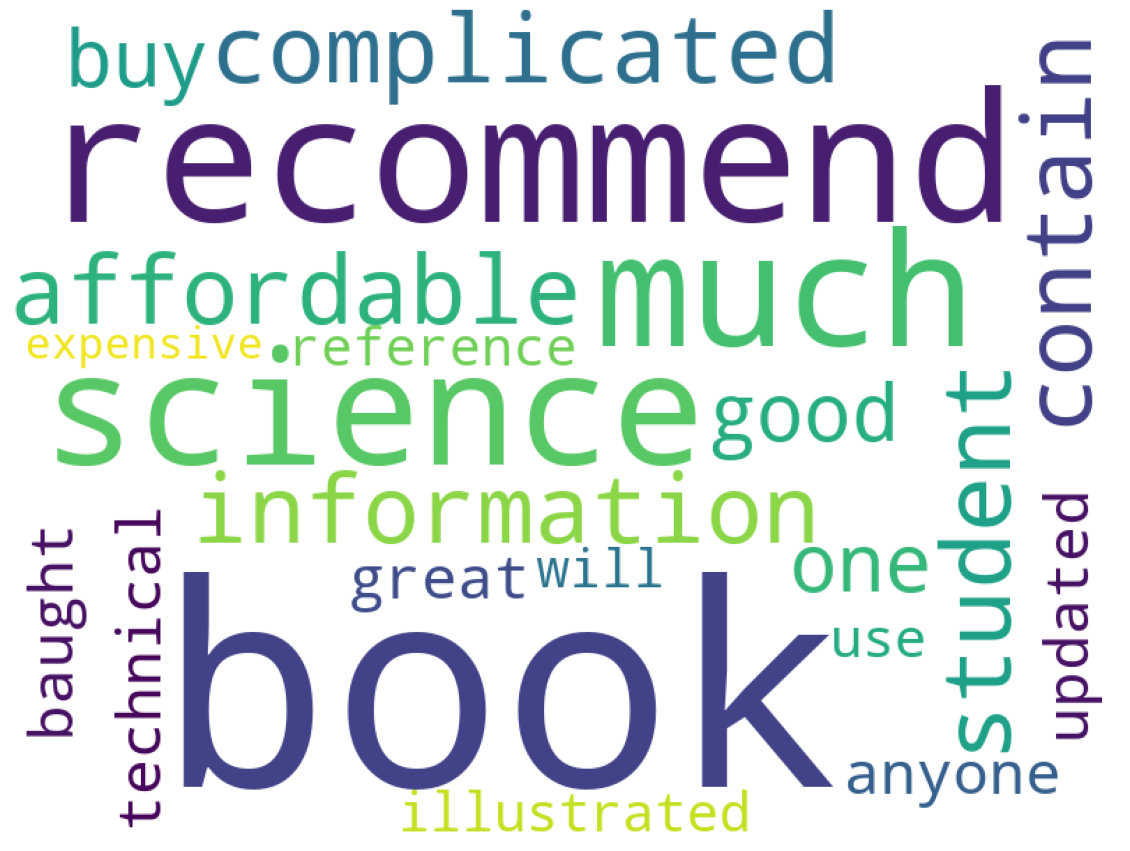

In [75]:
#initialize the wordcloud
wordcloud = WordCloud(background_color='white', width = 800, height = 600)
#passing in the reviews
review_cloud = wordcloud.generate(' '.join(reviews['texts']))
#plotting the results:
plt.figure(figsize = (20,30))
plt.imshow(review_cloud)
plt.axis('off')
plt.show()


#### 3iv. How my client could benefit from the word cloud

###### 1. My client would be able to analyze customer and emloyee feedback
###### 2. My customer would be able to identify new SEO keywords to target